# Using the model server to do an inference using REST
Based on [YOLOv5 Model Serving on RHODS](https://github.com/rh-aiservices-bu/yolov5-model-serving.git)

## First, make sure we have the libraries we need
Have a look at requirements.txt to see which libraries are used. You can ignore compatibility errors if any when doing the import.

In [1]:
!pip install -qr requirements.txt


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


## Unpack the image data
We need images to test the inferencing.

Check if data is already unpacked:

In [2]:
!ls -l yolov5/data/wind-turbine/*

-rw-r--r--. 1 1000860000 1000860000  106 Oct 31 07:35 yolov5/data/wind-turbine/data.yaml
-rw-r--r--. 1 1000860000 1000860000  929 Oct 31 07:40 yolov5/data/wind-turbine/README.txt

yolov5/data/wind-turbine/test:
total 8
drwxr-sr-x. 2 1000860000 1000860000 4096 Oct 31 07:35 images
drwxr-sr-x. 2 1000860000 1000860000 4096 Oct 31 07:35 labels

yolov5/data/wind-turbine/train:
total 56
drwxr-sr-x. 2 1000860000 1000860000 12288 Oct 31 07:35 images
drwxr-sr-x. 2 1000860000 1000860000  4096 Oct 31 07:35 labels
-rw-r--r--. 1 1000860000 1000860000 37876 Apr 15 17:31 labels.cache

yolov5/data/wind-turbine/valid:
total 24
drwxr-sr-x. 2 1000860000 1000860000  4096 Oct 31 07:35 images
drwxr-sr-x. 2 1000860000 1000860000  4096 Oct 31 07:35 labels
-rw-r--r--. 1 1000860000 1000860000 12674 Apr 15 17:31 labels.cache


... if not, run next cells:

In [5]:
# Download data
!curl -LO https://github.com/sa-mw-dach/windy-journey/releases/download/v0.0.0/annotated-wind-turbine-surface-damage-200.tar.gz

In [ ]:
# Unpack data
!mkdir -p yolov5/data/wind-turbine
!tar zxf annotated-wind-turbine-surface-damage-200.tar.gz -C yolov5/data
!ls -l yolov5/data/wind-turbine/*

## Import the libraries and module where we have all helper code for doing the inference

In [3]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image

from remote_infer_rest import ort_v5

## Enter the inference URL, the YAML file with your classes

Please update the `infer_url` with the URL of your deployed model:

In [4]:
infer_url = 'https://wvi-wvi-user1.apps.cluster-xcjpz.sandbox2806.opentlc.com/v2/models/wvi/infer'

# Example with an external route: infer_url = 'https://yolo-project-name.apps.rhods-internal.61tk.p1.openshiftapps.com/v2/models/yolo/infer'

classes_file = 'data.yaml'

## Now set the parameters for the inference

In [5]:
# 1. The image you want to analyze
image_path='yolov5/data/wind-turbine/train/images/DJI_0021_03_04.png' # You can replace this with an image you upload
#image_path='images/bus.jpg' 

# 2. Confidence threshold, between 0 and 1 (detections with less score won't be retained)
conf = 0.2

# 3. Intersection over Union Threshold, between 0 and 1 (cleanup overlapping boxes)
iou = 0.4

## Launch the inference and show the result

yolov5/data/wind-turbine/train/images/DJI_0021_03_04.png processed in 2.41 seconds, inference time 2.28 seconds
Predictions:
tensor([[100.0756, 155.1206, 148.6621, 194.9991,   0.7967,   1.0000],
        [ 58.1180, 227.5231,  83.5513, 247.3065,   0.7332,   1.0000],
        [ 82.1073, 227.1353,  97.5602, 239.8179,   0.7041,   1.0000],
        [ 41.7906, 245.6513,  62.0889, 268.6039,   0.6815,   1.0000],
        [132.7729, 195.2281, 163.2232, 226.3204,   0.6323,   1.0000],
        [170.0871, 214.6351, 181.7551, 229.4153,   0.5558,   1.0000],
        [ 97.1721, 225.4984, 108.6573, 234.3812,   0.5003,   1.0000],
        [ -0.6966, 266.9565,  42.0772, 301.9310,   0.4304,   1.0000]],
       dtype=torch.float64)
Format: each detection is a float64 array shaped as [top_left_corner_x, top_left_corner_y, bottom_right_corner_x, bottom_right_corner_y, confidence, class_index]
The coordinates are relative to a letterboxed representation of the image of size 640x640


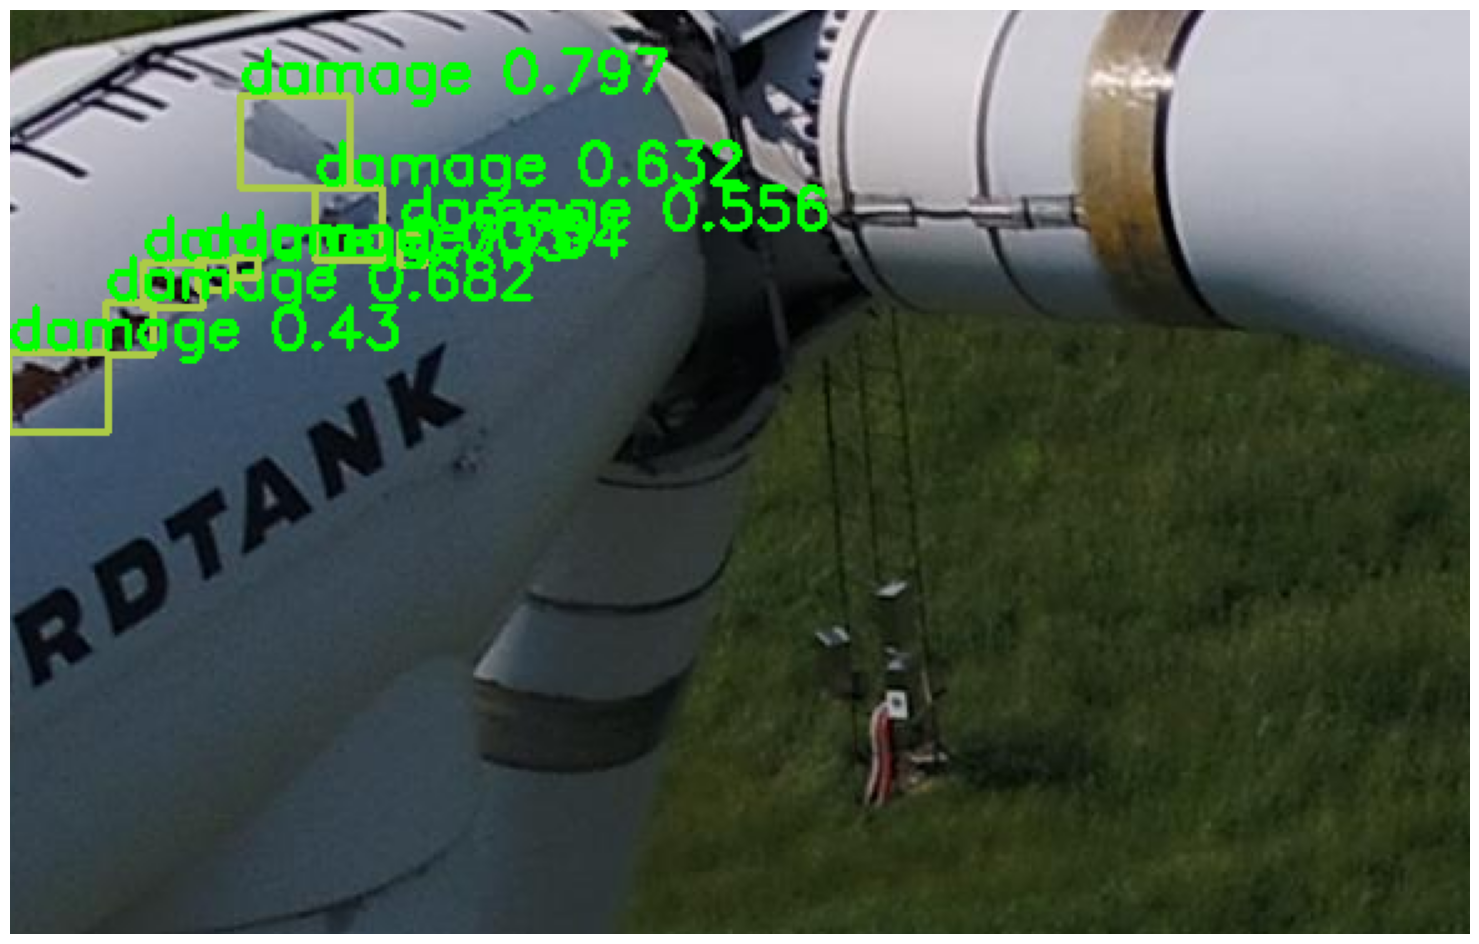

In [6]:
infer=ort_v5(image_path, infer_url, conf, iou, 640, classes_file)
img, out, result = infer()
print(f'{result}')
print('Predictions:')
print(out)
print('Format: each detection is a float64 array shaped as [top_left_corner_x, top_left_corner_y, bottom_right_corner_x, bottom_right_corner_y, confidence, class_index]')
print('The coordinates are relative to a letterboxed representation of the image of size 640x640')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.gcf()
fig.set_size_inches(24, 12)
plt.axis('off')
plt.imshow(img);